# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import ParenthesizationDataset, ParenthesizationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Initialization
Set the parameters here for training and initialize the train/test datasets, data loaders, model, loss function and optimizer.

In [2]:
n = 7
epochs = 50
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 32

# TODO: Create the datasets, model, loss function, optimizer, and data loader.
data = ParenthesizationDataset(n)
train_dataset, test_dataset = random_split(data, [int(train_split * len(data)), len(data) - int(train_split * len(data))])
model = ParenthesizationModel(n)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Training the model
* Call `train_one_epoch` repeatedly to train the model once over the entire training dataset.
* Print out the epoch number and loss after each training call to verify that the loss is going down.
* Record the loss values in a list so that it can be plotted in the cell below.
* After training, call `evaluate_model` to get the confusion matrix.
* Save the model as `models/linear_model_{n}.pt`.

In [3]:
loss = []
for epoch in range(epochs):
    loss.append(train_one_epoch(train_dataloader, model, loss_fn, optimizer))
    print(f'Epoch: {epoch}/{epochs}, Loss: {loss[-1]}')
confusion_matrix = evaluate_model(model, test_dataset)
print(f'confusion_matrix: {confusion_matrix}')
torch.save(model, f'models/linear_model_{n}.pt')

Epoch: 0/50, Loss: 14.003821074962616
Epoch: 1/50, Loss: 13.376671493053436
Epoch: 2/50, Loss: 12.768559098243713
Epoch: 3/50, Loss: 12.454076766967773
Epoch: 4/50, Loss: 11.92979022860527
Epoch: 5/50, Loss: 11.407976120710373
Epoch: 6/50, Loss: 11.052325248718262
Epoch: 7/50, Loss: 10.908481925725937
Epoch: 8/50, Loss: 10.816518604755402
Epoch: 9/50, Loss: 10.213451117277145
Epoch: 10/50, Loss: 9.961505979299545
Epoch: 11/50, Loss: 9.79256585240364
Epoch: 12/50, Loss: 9.488960921764374
Epoch: 13/50, Loss: 9.123646631836891
Epoch: 14/50, Loss: 9.160416841506958
Epoch: 15/50, Loss: 8.985221952199936
Epoch: 16/50, Loss: 8.673800483345985
Epoch: 17/50, Loss: 8.59528911113739
Epoch: 18/50, Loss: 8.435475438833237
Epoch: 19/50, Loss: 8.587657690048218
Epoch: 20/50, Loss: 8.359670460224152
Epoch: 21/50, Loss: 8.183549642562866
Epoch: 22/50, Loss: 8.145478963851929
Epoch: 23/50, Loss: 8.16097941994667
Epoch: 24/50, Loss: 7.760220408439636
Epoch: 25/50, Loss: 7.852902472019196
Epoch: 26/50, Lo

# Plot the loss curve
Plot the loss curve with appropriate figure title and axis labels. Save the resulting figure in `figures/loss_curve_{n}.png`.

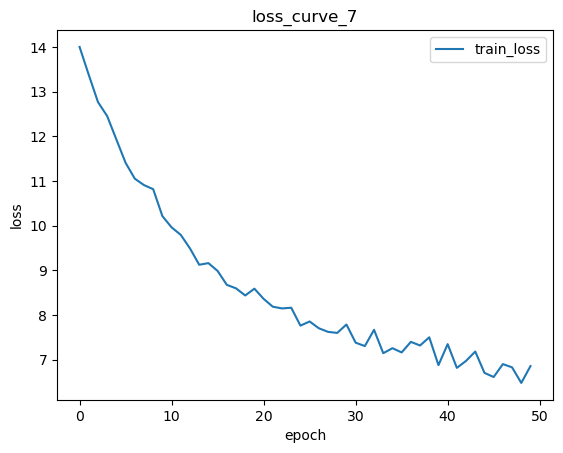

In [4]:
plt.figure()
plt.plot(loss, label='train_loss')
plt.title(f'loss_curve_{n}')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig(f'figures/loss_curve_{n}.png')

# Analyze accuracy using the confusion matrix
- Print out the accuracy within each of the prediction classes.
- Print out the size of each prediction class.
- Print out the overall accuracy.

In [5]:
print(f'Accuracy of prediction class 0: {confusion_matrix[0][0] / sum(confusion_matrix[0])}')
print(f'Accuracy of prediction class 1: {confusion_matrix[1][1] / sum(confusion_matrix[1])}')
print(f'Size of prediction class 0: {sum(confusion_matrix[0])}')
print(f'Size of prediction class 1: {sum(confusion_matrix[1])}')
print(f'Overall Accuracy: {(confusion_matrix[0][0] + confusion_matrix[1][1]) / (sum(confusion_matrix[0]) + sum(confusion_matrix[1]))}')

Accuracy of prediction class 0: 0.8333333333333334
Accuracy of prediction class 1: 1.0
Size of prediction class 0: 84
Size of prediction class 1: 85
Overall Accuracy: 0.9171597633136095


# Plot the model weights
Can you interpret what the model is doing? Plot the model weights using `plt.imshow()` to get a heatmap. Choose a colormap from https://matplotlib.org/stable/users/explain/colors/colormaps.html that you prefer. I default to the `bwr` colormap where negative values are blue, positive value are red, and values close to zero are white.

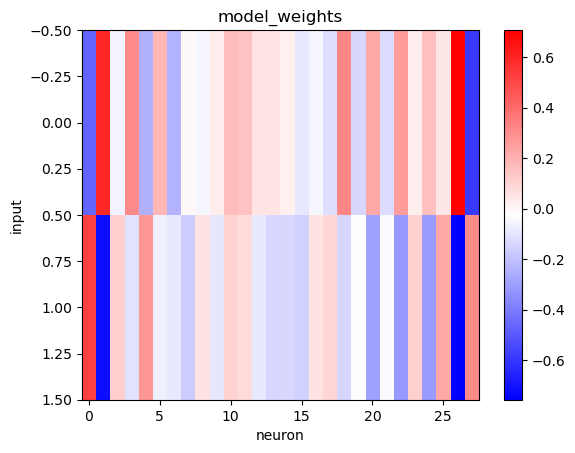

In [6]:
with torch.no_grad():
    plt.imshow(model.fc.weight, cmap='bwr', aspect='auto')
    plt.colorbar()
    plt.title('model_weights')
    plt.xlabel('neuron')
    plt.ylabel('input')
    plt.savefig('figures/model_weights.png')
    plt.show()

# "Translate" the model into code.
Implement `simple_evaluate` which condenses the model's "logic" into a single if-else statement. Run this evaluation function over the test set to produce a new confusion matrix and see how it performs compared to the model you train.

In [7]:
# Try to condense the linear model down into a single if-else statement.
def simple_evaluate(input):
    with torch.no_grad():
        weights = model.fc.weight
        bias = model.fc.bias
        val = torch.sigmoid(input @ weights.T + bias)
        if val[0] > val[1]:
            return 0
        else:
            return 1

model.eval()

with torch.no_grad():
    confusion_matrix = [[0, 0], [0, 0]]
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
    for inputs, labels in test_loader:
        outputs = model(inputs)
        for input, true_label in zip(inputs, labels):
            predicted = simple_evaluate(input)
            confusion_matrix[true_label][predicted] += 1
    print(f'confusion matrix: {confusion_matrix}')

print(f'Accuracy of prediction class 0: {confusion_matrix[0][0] / sum(confusion_matrix[0])}')
print(f'Accuracy of prediction class 1: {confusion_matrix[1][1] / sum(confusion_matrix[1])}')
print(f'Size of prediction class 0: {sum(confusion_matrix[0])}')
print(f'Size of prediction class 1: {sum(confusion_matrix[1])}')
print(f'Overall Accuracy: {(confusion_matrix[0][0] + confusion_matrix[1][1]) / (sum(confusion_matrix[0]) + sum(confusion_matrix[1]))}')

confusion matrix: [[70, 14], [0, 85]]
Accuracy of prediction class 0: 0.8333333333333334
Accuracy of prediction class 1: 1.0
Size of prediction class 0: 84
Size of prediction class 1: 85
Overall Accuracy: 0.9171597633136095
